In [117]:
import os 
import matplotlib.pyplot as plt 
import pandas as pd 
import subprocess
import datetime

In [7]:
# path to the download folder, where the SPHERA dataset files are located
file_path = "C:/Users/sarko/Downloads/1.7z"
# path to the destination folder
dest_path = "C:/Users/sarko/Downloads/7/"
# unzip files 

subprocess.call(r'"C:/Program Files/7-Zip/7z.exe" x ' + file_path + ' -o' + dest_path)

files = os.listdir('C:/Users/sarko/Downloads/7/')


In [109]:
files = os.listdir('C:/Users/sarko/Downloads/7/1')
dateparse = lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
df = pd.read_csv(dest_path+'/1/'+files[0], parse_dates=['Timestamp'], date_parser=dateparse, compression='bz2')
#df =df.set_index('Timestamp')

In [177]:
Amps=df['Amps'].apply(lambda x: 
                           np.fromstring(
                               x.replace('/n','')
                                .replace('"','')
                                .replace('[','')
                                .replace(']','')
                                .replace('  ',' ')
                                .replace(' ',''), sep=','))
Amps = Amps[0].tolist()
Volts=df['Volts'].apply(lambda x: 
                           np.fromstring(
                               x.replace('/n','')
                                .replace('"','')
                                .replace('[','')
                                .replace(']','')
                                .replace('  ',' ')
                                .replace(' ',''), sep=','))
Volts = Volts[0].tolist()
Timestamp = [(df['Timestamp'][0]-datetime.datetime(1970,1,1)).total_seconds()]*len(Volts)
Nanoseconds= [0]
for i in range(1,len(Volts)) :
    Nanoseconds.append(Nanoseconds[i-1]+15.625)
    

In [208]:
nanotime =[]
for i in range (len (Timestamp)):
    nanotime.append(pd.to_datetime(Timestamp[i]+Nanoseconds[i]/1e6, unit='s'))
dfb= pd.DataFrame()
dfb['Timestamp'] =  pd.to_datetime(nanotime)

dfb['Amps']= Amps
dfb['Volts'] = Volts
dfb= dfb.set_index('Timestamp')

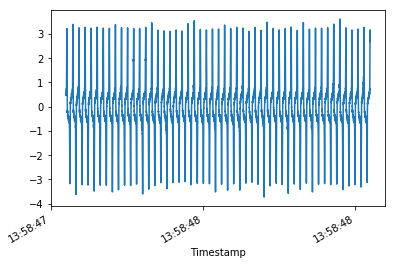

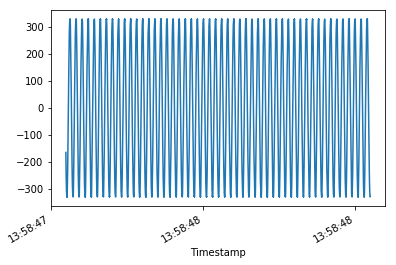

In [213]:
# basic visualisation 
dfb['Amps'].plot()
plt.show()
dfb['Volts'].plot()
plt.show()

In [89]:
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f')
GT_path = 'C:/Users/sarko/OneDrive/Desktop/Groundtruth/GroundTruth_.csv'
gt = pd.read_csv(GT_path, parse_dates=['GTtime'], date_parser=dateparse )
gt = gt.set_index('GTtime')